## Imported needed Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from datetime import date
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm

In [69]:
# Read in train dataset as ames
ames = pd.read_csv('./datasets/train.csv')

In [70]:
# Viewed info on dataframe
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [71]:
# Viewed shape
ames.shape

(2051, 81)

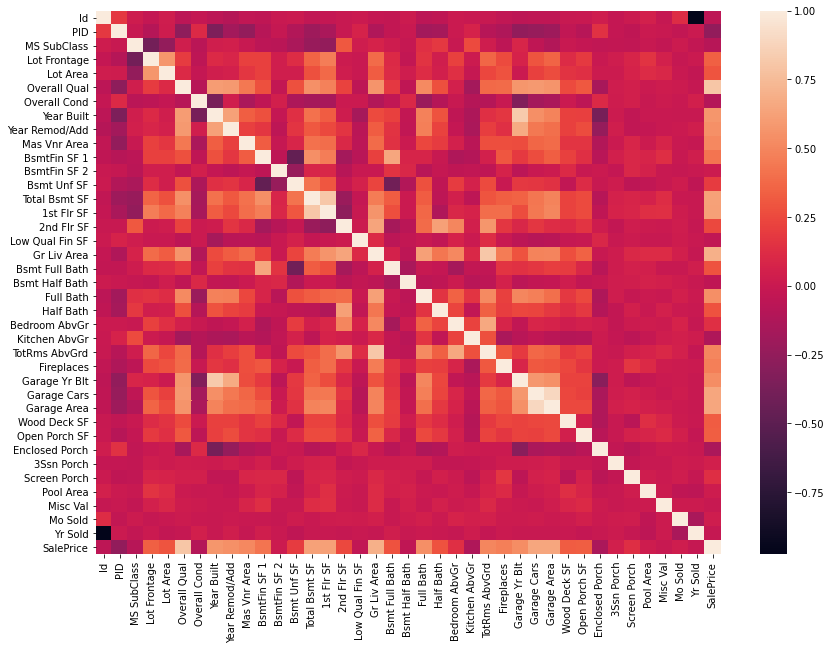

In [72]:
# Almost unreadable heatmap
corr = ames.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr)
plt.show()

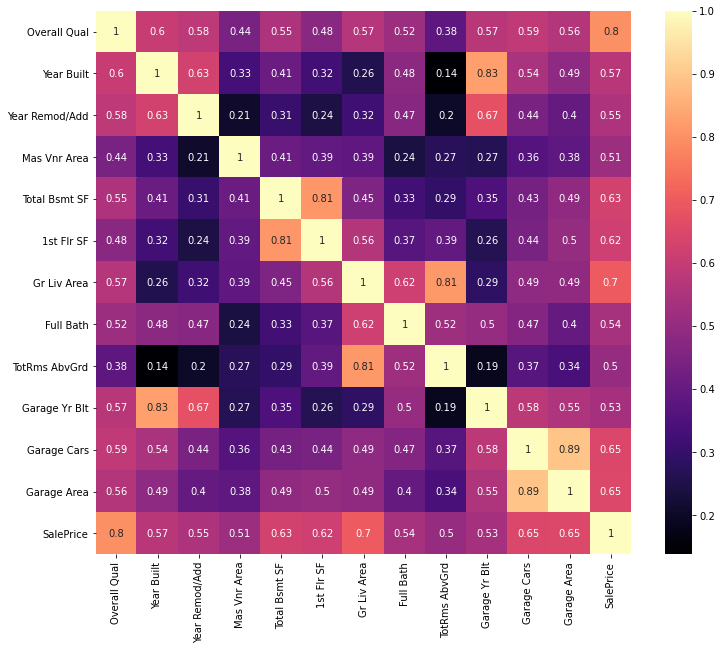

In [73]:
# Heatmap for top correlated features, correlation of .5 or higher was used
top_corr = ames.corr()
top_corr_features = top_corr.index[abs(top_corr["SalePrice"])>0.5]
plt.figure(figsize=(12,10))
g = sns.heatmap(ames[top_corr_features].corr(),annot=True,cmap="magma")

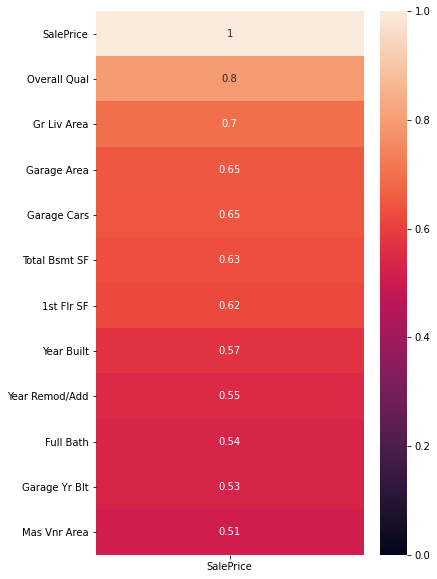

In [74]:
# Ran a one column heatmap to see correlation between sales price and the most correlated columns

corr = ames.corr()
plt.figure(figsize = (6,10))
sns.heatmap(corr[["SalePrice"]].sort_values(by = "SalePrice", ascending = False).head(12),vmin = 0, annot = True)
plt.show()

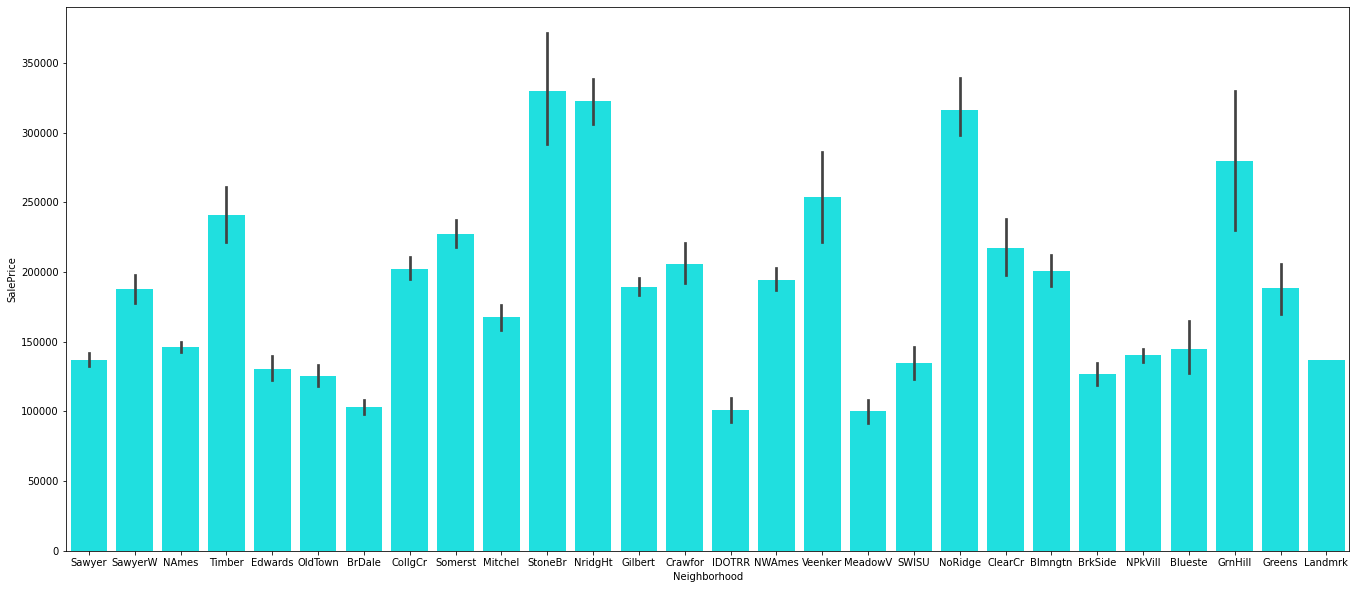

In [88]:
# Created barplot to view neighborhood salesprices
fig, ax = plt.subplots(figsize=(23,10))

sns.barplot(x="Neighborhood",
            y="SalePrice", data=ames, estimator=np.mean,
           color='cyan')
plt.show()

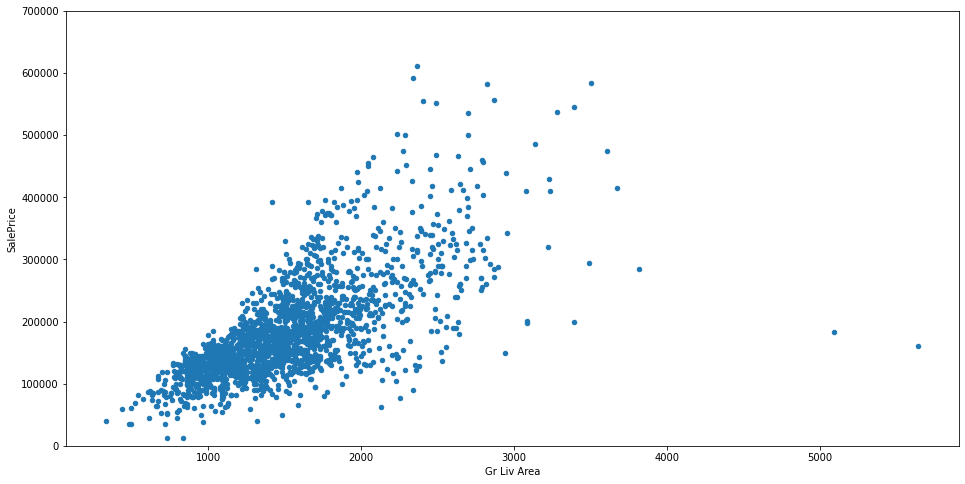

In [9]:
# Scatter plot on Gr Liv Area
ames.plot.scatter(x='Gr Liv Area', y='SalePrice', figsize=(16, 8), ylim=(0,700000));

# EDA

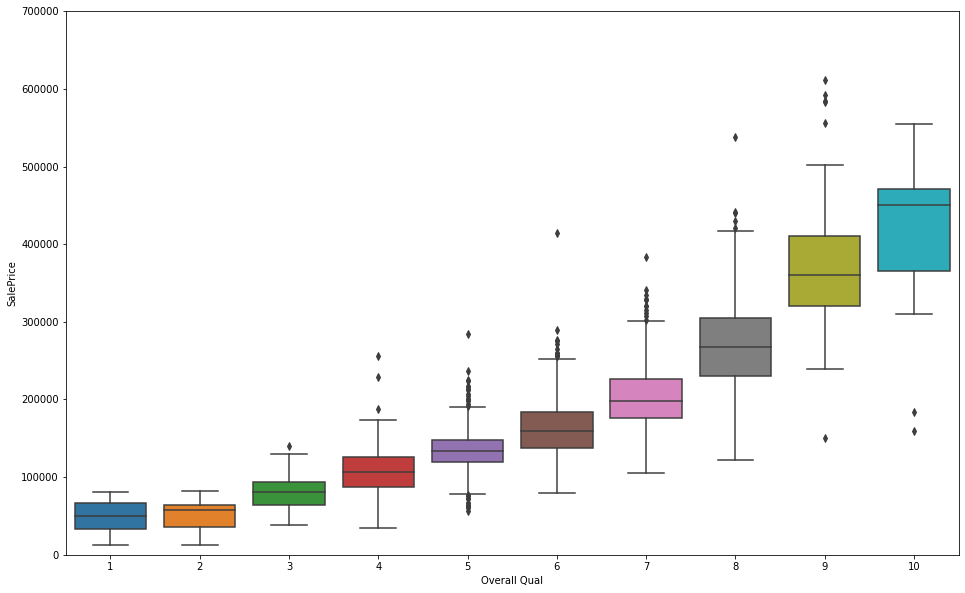

In [10]:
# Ran boxplots on overall condition vs price
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Overall Qual', y="SalePrice", data=ames)
fig.axis(ymin=0, ymax=700000);

In [11]:
# Viewing missing values in each column
#Dropped the 5 columns with more than 1000 missing values

ames_isnull = ames.isna().sum().sort_values(ascending=False)
ames_isnull[ames_isnull > 0]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
dtype: int64

In [12]:
# Dropped the 5 columns with over 1000 missing values
drop_columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
ames.drop(columns= drop_columns, axis=1,inplace=True)
ames.shape

(2051, 76)

In [13]:
# Viewed the remaining null values
ames_isnull = ames.isna().sum().sort_values(ascending=False)
ames_isnull[ames_isnull > 0]


Lot Frontage      330
Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Cond       114
Garage Type       113
Bsmt Exposure      58
BsmtFin Type 2     56
Bsmt Qual          55
BsmtFin Type 1     55
Bsmt Cond          55
Mas Vnr Area       22
Mas Vnr Type       22
Bsmt Full Bath      2
Bsmt Half Bath      2
BsmtFin SF 2        1
BsmtFin SF 1        1
Total Bsmt SF       1
Bsmt Unf SF         1
Garage Cars         1
Garage Area         1
dtype: int64

In [14]:
# These numbers are categorical, not numerical so I converted them to a string
ames['MS SubClass'] = ames['MS SubClass'].astype(str)
ames['Yr Sold'] = ames['Yr Sold'].astype(str)
ames['Mo Sold'] = ames['Mo Sold'].astype(str)

In [15]:
# Filled empty Lot Frontage with the average
ames['Lot Frontage'] = ames['Lot Frontage'].fillna(ames['Lot Frontage'].mean())
ames['Garage Area'] = ames['Garage Area'].fillna(ames['Garage Area'].mean())

In [16]:
# Took forever making a for loop to put NA in the empty cells
for col in ('Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'):
    ames[col] = ames[col].fillna('NA')

In [17]:
# I took Basement Square feet empty  means no basement
ames['Total Bsmt SF'] = ames['Total Bsmt SF'].fillna(0)
ames['BsmtFin SF 1'] = ames['BsmtFin SF 1'].fillna(0)
ames['BsmtFin SF 2'] = ames['BsmtFin SF 2'].fillna(0)
ames['Bsmt Unf SF'] = ames['Bsmt Unf SF'].fillna(0)

In [18]:
# I used the mode for these, each had only 22 or less empty cells
ames['Bsmt Half Bath'] = ames['Bsmt Half Bath'].fillna(ames['Bsmt Half Bath'].mode()[0])
ames['Bsmt Full Bath'] = ames['Bsmt Full Bath'].fillna(ames['Bsmt Full Bath'].mode()[0])
ames['Mas Vnr Type'] = ames['Mas Vnr Type'].fillna(ames['Mas Vnr Type'].mode()[0])
ames['Garage Cars'] = ames['Garage Cars'].fillna(ames['Garage Cars'].mode()[0])
ames['Electrical'] = ames['Electrical'].fillna(ames['Electrical'].mode()[0])

In [19]:
# These 4 garage columns had 114 missing values each, I listed these as no Garage
for col in ('Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type'):
    ames[col] = ames[col].fillna('No Garage')

In [20]:
# I took Garage Year Built  empty means no Garage
ames['Garage Yr Blt'] = ames['Garage Yr Blt'].fillna(0)

In [21]:
# I took Mas Vnr Area empty means no Mas Vnr Area
ames['Mas Vnr Area'] = ames['Mas Vnr Area'].fillna(0)

In [22]:
# Made a new column for Total square feet for the house, removed the 3 columns to make it up
ames['Total SF'] = ames['Total Bsmt SF'] + ames['1st Flr SF'] + ames['2nd Flr SF']
# ames.drop(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF'], axis=1, inplace=True)

In [23]:
# Made a coumn for has porch from the other porch columns
ames['Porch'] = ames['Enclosed Porch'] + ames['3Ssn Porch'] + ames['Screen Porch']+ ames['Open Porch SF']
ames['Porch'] = np.where(ames['Porch']>=1,1,0)
ames.drop(['Enclosed Porch', '3Ssn Porch', 'Screen Porch','Open Porch SF'], axis=1, inplace=True)

In [24]:
# Did log of these 5 columns
ames['Year Built_log'] = np.log(ames['Year Built'])
ames['TotRms AbvGrd_log'] = np.log(ames['TotRms AbvGrd'])
ames['1st Flr SF_log'] = np.log(ames['1st Flr SF'])
ames['Gr Liv Area_log'] = np.log(ames['Gr Liv Area'])
ames['Total SF_log'] = np.log(ames['Total SF'])


In [25]:
# Made price per square feet, but left it out because the test data does not have the salesprice
# ames["Price Per SF"] = ames["SalePrice"]/ames["Gr Liv Area"]

In [26]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Yr Sold,Sale Type,SalePrice,Total SF,Porch,Year Built_log,TotRms AbvGrd_log,1st Flr SF_log,Gr Liv Area_log,Total SF_log
0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,...,2010,WD,130500,2204.0,1,7.588830,1.791759,6.586172,7.299121,7.698029
1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,...,2009,WD,220000,3035.0,1,7.598900,2.079442,6.816736,7.660114,8.017967
2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,...,2010,WD,109000,2114.0,1,7.577122,1.609438,6.963190,6.963190,7.656337
3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,...,2010,WD,174000,1828.0,0,7.603898,1.945910,6.612041,7.275172,7.510978
4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,...,2010,WD,138500,2121.0,1,7.549609,1.791759,6.722630,7.275865,7.659643


In [27]:
# Dropped less than 10 outliers to improve predictions
ames.drop(ames[ames['Total SF'] >= 5500].index, inplace=True)
ames.drop(ames[ames['SalePrice'] >= 535000].index, inplace=True)

In [28]:
# EDA has gotten rid of the null values

ames_isnull = ames.isna().sum().sort_values(ascending=False)
ames_isnull[ames_isnull > 0]

Series([], dtype: int64)

In [29]:
# #Made dummy columns for the non numerical dataframes with one hot encoding
# Did not use most of the dummy columns so I commented this out
# ames = pd.get_dummies(ames,drop_first=True)
# ames.head()

In [30]:
# Ran get dummies on Neighborhood 
ames = pd.get_dummies(ames,columns = ['Neighborhood'])
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0


In [31]:
# Used for list of column names
# list(ames)

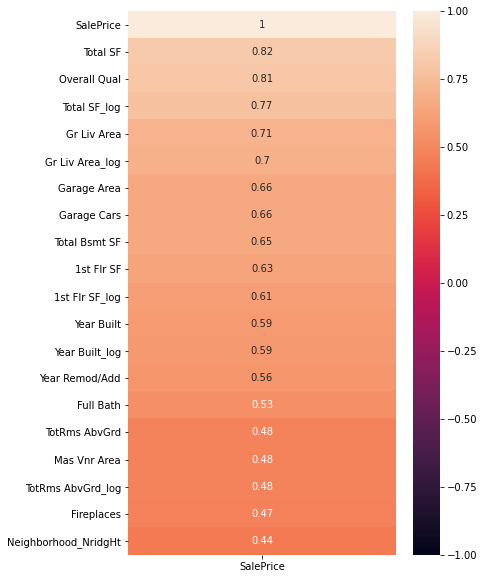

In [32]:
# Re-ran correlation after EDA
corr = ames.corr()
plt.figure(figsize = (6,10))
sns.heatmap(corr[["SalePrice"]].sort_values(by = "SalePrice", ascending = False).head(20),vmin = -1, annot = True)
plt.show()

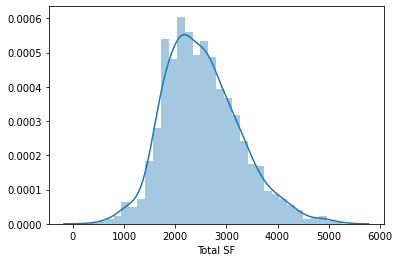

In [33]:
# Distribution plot for total square feet
sns.distplot(ames['Total SF']);

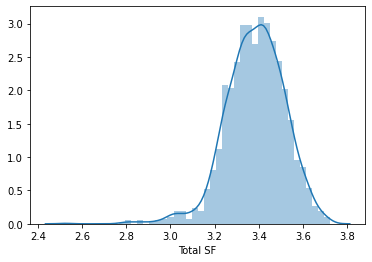

In [34]:
# Distribution plot for log of Total square feet
sns.distplot(np.log10(ames['Total SF']))

In [35]:
# features = [col for col in ames._get_numeric_data().columns if col != 'SalePrice']

#Features to use for train and test data sets
features = [
            'Gr Liv Area',
            'Year Built',
            'Total SF',
            'TotRms AbvGrd',
            'Fireplaces',
            'Overall Qual', 
            'Gr Liv Area',
            'Garage Area', 
            'Year Remod/Add',
#             'Mas Vnr Area',
#             'Total Bsmt SF',
#             'Lot Area', 
#             'Pool Area',
            'Year Built_log',
            'TotRms AbvGrd_log',
            '1st Flr SF_log',
            'Gr Liv Area_log',
            'Total SF_log',
#             'Neighborhood_Blmngtn',
            'Neighborhood_Blueste',
             'Neighborhood_BrDale',
             'Neighborhood_BrkSide',
             'Neighborhood_ClearCr',
             'Neighborhood_CollgCr',
             'Neighborhood_Crawfor',
             'Neighborhood_Edwards',
             'Neighborhood_Gilbert',
             'Neighborhood_Greens',
             'Neighborhood_GrnHill',
             'Neighborhood_Landmrk',
             'Neighborhood_IDOTRR',
             'Neighborhood_MeadowV',
             'Neighborhood_Mitchel',
             'Neighborhood_NAmes',
             'Neighborhood_NPkVill',
             'Neighborhood_NWAmes',
             'Neighborhood_NoRidge',
             'Neighborhood_NridgHt',
             'Neighborhood_OldTown',
             'Neighborhood_SWISU',
             'Neighborhood_Sawyer',
             'Neighborhood_SawyerW',
             'Neighborhood_Somerst',
             'Neighborhood_StoneBr',
             'Neighborhood_Timber',
             'Neighborhood_Veenker',
            

]

## Creating the Model

In [36]:
# Created x and y variables for my model
ames_features = features
y =ames['SalePrice'] # y = what we want to predict
X = ames[ames_features]

In [37]:
# Created my model and started the train test split
# Help from Daniel getting the standard scaler working

linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler().fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
linreg.fit(X_train_scaler, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_preds = linreg.predict(X_train)
test_pred = linreg.predict(X_test_scaler)

In [39]:
# Ran cross val score on training
cross_val_score(linreg, X_train, y_train)

array([0.87876779, 0.8926449 , 0.85356438, 0.85432863, 0.86322522])

In [40]:
# Ran mean of the cross val score on training
cross_val_score(linreg, X_train, y_train).mean()

0.8685061834848954

In [41]:
# Ran my model on the training
linreg.score(X_train_scaler,y_train)

0.8804746185646561

In [42]:
# Ran my model on the testing
linreg.score(X_test_scaler,y_test)

0.8713438551257846

In [43]:
# Predictions
preds_train = linreg.predict(X_train_scaler)
preds_test = linreg.predict(X_test_scaler)

In [44]:
# The MSE for training
mean_squared_error(y_train, preds_train)

645354327.3824127

In [45]:
# The MSE for testing
mean_squared_error(y_test, preds_test)

739369201.3478884

In [46]:
# The RMSE for training
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_train

25403.825054160894

In [47]:
# The RMSE for testing
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
rmse_test

27191.34423576533

In [48]:
# The r2 score for training
metrics.r2_score(y_train, preds_train)

0.8804746185646561

In [49]:
# The r2 score for testing
metrics.r2_score(y_test, preds_test)

0.8713438551257846

## Using the Test Data

In [50]:
# Imported the test data set
test = pd.read_csv('./datasets/test.csv')

In [51]:
# Deopped same 5 columns as above
drop_columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
test.drop(columns= drop_columns, axis=1,inplace=True)
test.shape

(878, 75)

In [52]:
# Copied down the EDA from above and ran it in one cell
test['MS SubClass'] = test['MS SubClass'].astype(str)
test['Yr Sold'] = test['Yr Sold'].astype(str)
test['Mo Sold'] = test['Mo Sold'].astype(str)
test['Lot Frontage'] = test['Lot Frontage'].fillna(test['Lot Frontage'].mean())
test['Garage Area'] = test['Garage Area'].fillna(test['Garage Area'].mean())
for col in ('Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'):
    test[col] = test[col].fillna('NA')
test['Total Bsmt SF'] = test['Total Bsmt SF'].fillna(0)
test['BsmtFin SF 1'] = test['BsmtFin SF 1'].fillna(0)
test['BsmtFin SF 2'] = test['BsmtFin SF 2'].fillna(0)
test['Bsmt Unf SF'] = test['Bsmt Unf SF'].fillna(0)
test['Bsmt Half Bath'] = test['Bsmt Half Bath'].fillna(test['Bsmt Half Bath'].mode()[0])
test['Bsmt Full Bath'] = test['Bsmt Full Bath'].fillna(test['Bsmt Full Bath'].mode()[0])
test['Mas Vnr Type'] = test['Mas Vnr Type'].fillna(test['Mas Vnr Type'].mode()[0])
test['Garage Cars'] = test['Garage Cars'].fillna(test['Garage Cars'].mode()[0])
for col in ('Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type'):
    test[col] = test[col].fillna('No Garage')
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(0)
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0)
test['Total SF'] = test['Total Bsmt SF'] + test['1st Flr SF'] + test['2nd Flr SF']
# test.drop(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF'], axis=1, inplace=True)
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])
test['Porch'] = test['Enclosed Porch'] + test['3Ssn Porch'] + test['Screen Porch']+ test['Open Porch SF']
test['Porch'] = np.where(test['Porch']>=1,1,0)
test.drop(['Enclosed Porch', '3Ssn Porch', 'Screen Porch','Open Porch SF'], axis=1, inplace=True)
test['Year Built_log'] = np.log(test['Year Built'])
test['TotRms AbvGrd_log'] = np.log(test['TotRms AbvGrd'])
test['1st Flr SF_log'] = np.log(test['1st Flr SF'])
test['Gr Liv Area_log'] = np.log(test['Gr Liv Area'])
test['Total SF_log'] = np.log(test['Total SF'])

test_isnull = test.isna().sum().sort_values(ascending=False)
test_isnull[test_isnull > 0]

Series([], dtype: int64)

In [53]:
# Did not find most of the get dummies I created useful, commented the out
# test = pd.get_dummies(test,drop_first=True)
# test.head()

In [54]:
# Ran get dummies on Neighborhood and used one hot encoding
test = pd.get_dummies(test,columns = ['Neighborhood'])
test

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,2658,902301120,190,RM,69.000000,9142,Pave,Reg,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,0
1,2718,905108090,90,RL,69.545961,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,0,0
2,2414,528218130,60,RL,58.000000,17104,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.000000,8520,Pave,Reg,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,0
4,625,535105100,20,RL,69.545961,9500,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.000000,8000,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
874,1234,535126140,60,RL,90.000000,14670,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
875,1373,904100040,20,RL,55.000000,8250,Pave,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,0,0
876,1672,527425140,20,RL,60.000000,9000,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Added the 2 dummy columns that the test data did not have to make columns equal between the datasets
test['Neighborhood_GrnHill'] = "0"
test['Neighborhood_Landmrk'] = "0"

In [56]:
# Did not use -  dummy for all columns
# test = pd.get_dummies(test,columns=['Neighborhood'],drop_first=True)
# test.head()

In [57]:
# Cannot get log of salesprice to work

# test['LogSalePrice'] = np.log(test['SalePrice'])
test.shape


(878, 105)

In [58]:
# features = [col for col in test._get_numeric_data().columns if col != 'SalePrice']

# Used same features as for training
test_features = features

In [59]:
# Created salesprice column for test set
test['SalePrice'] = ""

In [60]:
# Instiantiated the X for testing
test_X = test[test_features]

In [61]:
# Ran my model on the Test_X
predicted_prices = linreg.predict(scaler.transform(test_X))

In [62]:
# Printed the prices so I could see if the change
# print(predicted_prices)


In [63]:
# created dataframe by dictionary to hold ID and Salesprice
clint_submission2 = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})

In [64]:
# vied dataframe
clint_submission2.head()

,Id,SalePrice
0,2658,142634.336860
1,2718,207431.292025
2,2414,187041.080048
3,1989,118058.887866
4,625,183514.938929


In [65]:
# Wrote dataframe to CSV
clint_submission2.to_csv('./datasets/clint_submission2.csv', index = False)

In [66]:
# # Uses this to help to zone in my model
linreg = sm.OLS(y_train, X_train).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2117.
Date:                Thu, 14 May 2020   Prob (F-statistic):                        0.00
Time:                        19:28:51   Log-Likelihood:                         -17655.
No. Observations:                1527   AIC:                                  3.539e+04
Df Residuals:                    1487   BIC:                                  3.560e+04
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gr Liv Area             30.9656      5.562      5.568      0.000      20.056      41.875
Year Built             322.7190     57.762      5.587      0.000     209.415     436.023
Total SF                69.1766      6.616     10.456      0.000      56.199      82.155
TotRms AbvGrd        -1.298e+04   3271.103     -3.969      0.000   -1.94e+04   -6567.109
Fireplaces            9143.6786   1315.534      6.951      0.000    6563.179    1.17e+04
Overall Qual          1.463e+04    857.078     17.072      0.000     1.3e+04    1.63e+04
Gr Liv Area             30.9656      5.562      5.568      0.000      20.056      41.875
Garage Area             36.6770      4.275      8.580      0.000      28.292      45.062
Year Remod/Add         326.3959     46.106      7.079      0.000     235.956     416.836
Year Built_log       -4.254e+04   2.28e+04     -1.866      0.062   -8.73e+04    2178.284
TotRms AbvGrd_log     7.473e+04    2.1e+04      3.550      0.000    3.34e+04    1.16e+05
1st Flr SF_log        2277.7144   3916.707      0.582      0.561   -5405.144    9960.572
Gr Liv Area_log      -6.831e+04   1.63e+04     -4.192      0.000      -1e+05   -3.63e+04
Total SF_log         -9.608e+04   1.44e+04     -6.694      0.000   -1.24e+05   -6.79e+04
Neighborhood_Blueste -1.352e+04   1.33e+04     -1.016      0.310   -3.96e+04    1.26e+04
Neighborhood_BrDale  -1.308e+04   9617.688     -1.360      0.174   -3.19e+04    5782.788
Neighborhood_BrkSide  1.501e+04   8066.902      1.860      0.063    -816.079    3.08e+04
Neighborhood_ClearCr  3.133e+04   8977.813      3.489      0.000    1.37e+04    4.89e+04
Neighborhood_CollgCr  9904.1789   6747.172      1.468      0.142   -3330.809    2.31e+04
Neighborhood_Crawfor  3.286e+04   7706.544      4.265      0.000    1.77e+04     4.8e+04
Neighborhood_Edwards  1.202e+04   7271.090      1.653      0.099   -2246.989    2.63e+04
Neighborhood_Gilbert  7193.2081   6970.698      1.032      0.302   -6480.238    2.09e+04
Neighborhood_Greens  -1.279e+04   2.67e+04     -0.479      0.632   -6.51e+04    3.96e+04
Neighborhood_GrnHill  1.086e+05   1.94e+04      5.593      0.000    7.05e+04    1.47e+05
Neighborhood_Landmrk -7352.9643   2.67e+04     -0.276      0.783   -5.96e+04    4.49e+04
Neighborhood_IDOTRR   8879.1334   8397.909      1.057      0.291   -7593.875    2.54e+04
Neighborhood_MeadowV -4016.6743   9127.491     -0.440      0.660   -2.19e+04    1.39e+04
Neighborhood_Mitchel   1.09e+04   7318.477      1.490      0.136   -3452.154    2.53e+04
Neighborhood_NAmes    1.204e+04   6938.938      1.736      0.083   -1568.168    2.57e+04
Neighborhood_NPkVill -9699.0574   1.02e+04     -0.953      0.341   -2.97e+04    1.03e+04
Neighborhood_NWAmes   4453.7393   7293.433     